## Project Overview

<p font-size:15px;">Wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.WeRateDogs has over 4 million followers and has received international media coverage.</p>


## steps :

>Step 1: Gathering data<br>
>Step 2: Assessing data<br>
>Step 3: Cleaning data<br>
>Step 4: Storing data<br>
>Step 5: Analyzing, and visualizing data<br>
>Step 6: Reporting

In [453]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests
import tweepy 
from tweepy import OAuthHandler
from tweepy import Cursor
import json
from timeit import default_timer as timer

## Step 1: Gather


> <span style="color:#0541a1; font-size:20px; font-weight: bold;" >Gather 3 pieces of data:</span>
> <ol style="font-size:19px;">
>    <li>The WeRateDogs Twitter archive<br>
>    <p style="font-size:16px;">read the given file `twitter_archive_enhanced.csv`</p></li><br><br>
>        <li>The tweet image predictions<br>
>   <p style="font-size:16px;"> This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</p><br><br></li>
>    <li>Additional data from the Twitter API<br>
    <p style="font-size:16px;">Gather each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.</p></li>
>  </ol>

In [454]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [455]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image_predictions.tsv' ,'wb') as file:
    file.write(requests.get(url).content)
    
    
image_prediction = pd.read_csv('image_predictions.tsv' , sep='\t')

In [460]:
import json
# save the dictionaries to a list
tweet_data=[]
# open file
with open('tweet-json.txt', 'r') as file:
    # read each line of the file
    for line in file:
        tweet_data.append(json.loads(line))

In [461]:
tweet_df=pd.DataFrame(tweet_data)

## Step 2: Assess

In [462]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [463]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [464]:
len(archive.columns)

17

>archive data frame has 2356 rows and 17 columns

In [465]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [466]:
archive[archive['name'] == "None"]['tweet_id'].count()

745

>745 rows with `None` name

In [467]:
archive[archive['name'] == "a"]['tweet_id'].count()

55

>55 rows with `a` name

In [468]:
archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

>denominator is not always 10 

In [469]:
archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

>there are some ratings with 0 

In [470]:
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


>No duplicated tweets.

In [471]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [472]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [473]:
len(image_prediction.columns)

12

read the given file `twitter_archive_enhanced.csv`

>`image_prediction` dataframe has 2075 rows and 12 columns which is less than the archive dataframe<br>
> no missing data in this data frame

In [474]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [475]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [476]:
len(tweet_df.columns)

31

>`tweet_df` data frame has 2354 rows and 31 columns , there are missing data in some columns

In [477]:
all_columns = pd.Series(list(archive) + list(image_prediction) + list(tweet_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

>When we get all 3 data frames together we can see that `tweet_id` , `source` , `in_reply_to_status_id` and ` in_reply_to_user_id` are duplicated columns.

#### Quality
##### `archive` table
- `in_reply_to_status_id` `in_reply_to_user_id` `retweeted_status_id` `retweeted_status_user_id` `retweeted_status_timestamp``source` columns are not needed.
- Removing the above columns does not remove the related rows , related rows need to be dropped first.
- validity issue in `rating_denominator` in some rows its not equal to 10.
- `names` with "a" , "not" , "my" , "an", "the" and "just" values.
- misssing `names` (can't clean).
- some `names` are lowercased.
- `timestamp` is string and ends with `+0000` which makes it not convertable (and should be `datetime`).
- alot missing in the `doggo`,`floofer`,`pupper`,`puppo` columns.
- `text`data includes short url at the end.



##### `image_prediction` table
- some predictions are not even animals .
- some predications are lowercased.
- some predictions are separated using underscores.
- `img_num` column is not needed.


##### `tweet_df` table
- there are too many columns that are not needed.


#### Tidiness
- In `archive` table `doggo`,`floofer`,`pupper`,`puppo` should be one column `dog_stage`
- `image_prediction` and `tweet_df` should be part of `archive` table

## Step 3: Clean

In [478]:
#copy data
archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_info_clean = tweet_df.copy()

#### Define

Remove rows that has non null values in each of these columns: `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp`.

#### Clean

In [479]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [480]:
archive_clean['retweeted_status_id'].unique() ,archive_clean['retweeted_status_user_id'].unique() ,archive_clean['retweeted_status_timestamp'].unique()

(array([nan]), array([nan]), array([nan], dtype=object))

now these columns only contain **nan** values.

#### Define

Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` `retweeted_status_timestamp`,`source` columns.

#### Clean

In [481]:
# Drop unnecessary columns
archive_clean = archive_clean.loc[:,['tweet_id' , 'text' ,'timestamp' ,'rating_numerator' , 'rating_denominator' , 'name' , 'doggo' , 'floofer' , 'pupper' , 'puppo']]

#### Test

In [482]:
#test
archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None


#### Define

Set all `rating_denominator` to 10.

#### Clean

In [483]:
#fix all rating_denominator that are not equal to 10 and set them to 10
archive_clean['rating_denominator'] = 10

#### Test

In [484]:
#test
archive_clean['rating_denominator'].unique()

array([10])

#### Define

Replace every `a`,`an`,`not`,`my`,`just` name with `None`.

#### Clean

In [485]:
#change 'a/an/not/my/just' names in the name column into none
archive_clean.loc[(archive_clean['name'] == 'a')
              |(archive_clean['name'] == 'an')
              |(archive_clean['name'] == 'my')
              |(archive_clean['name'] == 'not')
              |(archive_clean['name'] == 'just')
            |(archive_clean['name'] == 'the')
                   |(archive_clean['name'] == 'this'),'name'] = 'None'

#### Test

In [486]:
#Test
archive_clean[(archive_clean['name'] == 'a')|(archive_clean['name'] == 'an')|(archive_clean['name'] == 'my')|(archive_clean['name'] == 'not')|(archive_clean['name'] == 'the')]

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

First remove `+0000` from the end of the `timestamp` string then convert it to datetime type.

#### Clean

In [487]:
#remove the last `+0000` in timestamp string
archive_clean['timestamp'] = archive_clean['timestamp'].str[:-5]

#Convert timestamp to datatime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [488]:
type(archive_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Define

Merge `doggo`,`floofer`,`pupper`,`puppo` columns in one column and remove every `None` string.

#### Clean

In [489]:
#merge doggo floofer pupper puppo columns and remove every None
archive_clean['dog_stage'] = archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.replace('None','')

#### Test

In [490]:
archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13,10,Phineas,None,None,None,None,
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13,10,Tilly,None,None,None,None,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12,10,Archie,None,None,None,None,
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13,10,Darla,None,None,None,None,
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12,10,Franklin,None,None,None,None,


>Now the tweets with no stage has null value and some rows has 2 stages that are not separated.

#### Define

Fix `dog_stage` some rows have two dog stages , other rows are empty.<br>
For rows that has 2 dog stages : find out which one is right from `text` and replace.<br>
For empty rows means that there is no stage mentioned in the `text` fill the empty cells with `None` value.<br>
and finally, drop `doggo`,`floofer`,`pupper`,`puppo` columns.

#### Clean

In [491]:
#check for unique values in dog_stage
archive_clean['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [492]:
#checking
archive_clean[(archive_clean['dog_stage'] == 'doggopuppo')]['text']

191    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object

>According to the text the row that contains `doggopuppo` dog_stage is actually puppo

In [493]:
#Replace `doggopuppo` with 'puppo'
archive_clean[archive_clean['dog_stage'] == 'doggopuppo'] = 'puppo'

In [494]:
#check for rows that contains 'doggofloofer'
archive_clean[(archive_clean['dog_stage'] == 'doggofloofer')]['text']

200    At first I thought this was a shy doggo, but i...
Name: text, dtype: object

>According to the text and the image its a `floofer`.

In [495]:
#Replace 'doggofloofer' with 'floofer'
archive_clean[archive_clean['dog_stage'] == 'doggofloofer'] = 'floofer'

In [496]:
#Test
archive_clean[(archive_clean['dog_stage'] == 'doggofloofer')]['text']

Series([], Name: text, dtype: object)

In [497]:
#check for rows that contains 'doggopupper'
archive_clean[(archive_clean['dog_stage'] == 'doggopupper')]['text']

460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
565     Like doggo, like pupper version 2. Both 11/10 ...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

>Apparentely, there are 10 different rows that contains `doggopupper`
>As i scrolled through these rows i figured some rows should have `pupper` others should have `doggo`
>and some should have both `doggo and pupper` even the images has 2 dogs.

In [498]:
archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13,10,Phineas,None,None,None,None,
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13,10,Tilly,None,None,None,None,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12,10,Archie,None,None,None,None,
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13,10,Darla,None,None,None,None,
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12,10,Franklin,None,None,None,None,


In [499]:
#Make list of indecies to modify
stage_index = [460,531,565,575,705,733,778,889,956,1063,1113]

#Make list of stages to replace in the corresponding index above 
stage_list = ['pupper' , 'doggo and pupper' , 'doggo and pupper' , 'pupper' , 'doggo' , 'doggo and pupper' , 'doggo and pupper' , 'doggo and pupper' , 'doggo' , 'doggo and pupper','doggo and pupper']


#for loop to fix it by assigning each index with the propper stage
for i in range (11):
    archive_clean['dog_stage'][stage_index[i]] = stage_list[i]

In [500]:
#test
archive_clean['dog_stage'].value_counts()

                    1831
pupper               226
doggo                 77
puppo                 25
floofer               10
doggo and pupper       6
Name: dog_stage, dtype: int64

>Now we need to fill the empty cells with `None`

In [501]:
#Fill empty dog_stage with `None`
archive_clean.loc[archive_clean['dog_stage'] == '', 'dog_stage'] = 'None'

In [502]:
#Drop `doggo` `floofer` `pupper` and `puppo` columns
archive_clean = archive_clean.drop(['doggo' , 'floofer' , 'pupper' , 'puppo'] , axis=1)

In [503]:
#test
archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13,10,Phineas,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13,10,Tilly,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12,10,Archie,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13,10,Darla,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12,10,Franklin,None


#### Test

In [504]:
#Test
archive_clean['dog_stage'].value_counts()

None                1831
pupper               226
doggo                 77
puppo                 25
floofer               10
doggo and pupper       6
Name: dog_stage, dtype: int64

#### Define

Replace every url in `text` column with blank.

#### Clean

In [505]:
#Remove short url from each row in the text column
archive_clean['text'] = archive_clean['text'].replace('https.+', '', regex=True)

#### Test

In [506]:
#Test
archive_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2175, dtype: object

#### Define

capitalize predictions in `p1`,`p2` and `p3`

#### Clean

In [507]:
#make predictions start with a capital letter
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.capitalize()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.capitalize()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.capitalize()

#### Test

In [508]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Replace each underscore in prediction columns with space.

#### Clean

In [509]:
#Replace underscore separators with blank
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.replace('_' , ' ')
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.replace('_' , ' ')
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.replace('_' , ' ')

#### Test

In [510]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Drop `img_num` column.

#### Clean

In [511]:
#Drop img_url column 
image_prediction_clean = image_prediction_clean.drop('img_num',axis=1)

#### Test

In [512]:
image_prediction_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Remove all columns from `tweet_info_clean` only keep `id`,`retweet_count`,`favorite_count`.

#### Clean

In [513]:
#Remove not needed columns only keep retweet_count and favorite_count and tweet_id
tweet_info_clean = tweet_info_clean.loc[: , ['id' ,'retweet_count' ,'favorite_count']]

#### Test

In [514]:
tweet_info_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Define

Change label of `id` column to `tweet_id` to match other dataframes.

#### Clean

In [515]:
#change id label into tweet_id to make it mergable 
tweet_info_clean = tweet_info_clean.rename(columns={"id": "tweet_id"})

#### Test

In [516]:
tweet_info_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Define

Merge `tweet_info_clean` datafram with `archive_clean` by the tweet_id.

#### Clean

In [517]:
#Make tweet_info_clean part of archive_clean
archive_clean = pd.merge(archive_clean , tweet_info_clean, 
                           on = ['tweet_id'],
                           how = 'left')

#### Test

In [518]:
#Test
archive_clean

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13,10,Phineas,None,8853.0,39467.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13,10,Tilly,None,6514.0,33819.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12,10,Archie,None,4328.0,25461.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13,10,Darla,None,8964.0,42908.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12,10,Franklin,None,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,2015-11-16 00:24:50,5,10,None,None,41.0,111.0
2171,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,2015-11-16 00:04:52,6,10,None,None,147.0,311.0
2172,666033412701032449,Here is a very happy pup. Big fan of well-main...,2015-11-15 23:21:54,9,10,None,None,47.0,128.0
2173,666029285002620928,This is a western brown Mitsubishi terrier. Up...,2015-11-15 23:05:30,7,10,None,None,48.0,132.0


#### Define

Merge `image_prediction_celan` datafram with `archive_clean` by the tweet_id.

#### Clean

In [519]:
archive_clean = pd.merge(archive_clean , image_prediction_clean, 
                           on = ['tweet_id'],
                           how = 'left')

#### Test

In [520]:
#Test
archive_clean

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13,10,Phineas,None,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13,10,Tilly,None,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12,10,Archie,None,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13,10,Darla,None,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12,10,Franklin,None,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,2015-11-16 00:24:50,5,10,None,None,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2171,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,2015-11-16 00:04:52,6,10,None,None,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
2172,666033412701032449,Here is a very happy pup. Big fan of well-main...,2015-11-15 23:21:54,9,10,None,None,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
2173,666029285002620928,This is a western brown Mitsubishi terrier. Up...,2015-11-15 23:05:30,7,10,None,None,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True


>Since `archive` has 2175 rows and `image_prediction` has 2075 rows , there are 100 rows with missing `image_prediction` values.

#### Define

Remove rows with missing `jpg_url` by making empty cells nulls then drop the nulls

#### Clean

In [521]:
#Remove rows with missing `jpg_url`

#first make the empty cells null
archive_clean= archive_clean.replace(r'^s*$', float('NaN'), regex = True)

#Drop rows with null value 
archive_clean.dropna(inplace = True)  

#### Test

In [522]:
#Test
archive_clean.isna()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Step 3: Store data

In [523]:
archive_clean.to_csv('archive_clean.csv' , index=False)

## Step 4: Analyze, and visualize data

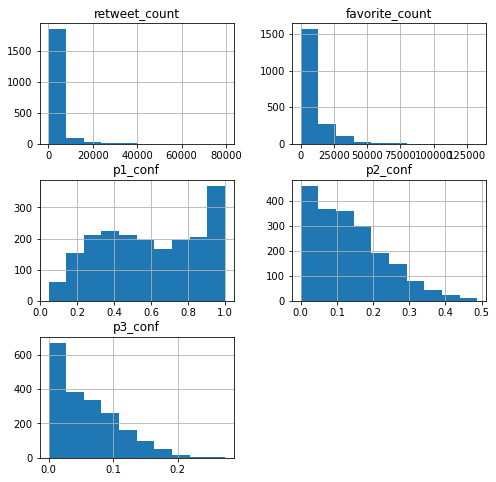

In [524]:
archive_clean.hist(figsize=(8,8));

### Top 5 rated dogs 

In [534]:
top_five= archive_clean.sort_values(by=['rating_numerator'] , ascending=False).head(5)
top_five

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
804,749981277374128128,This is Atticus. He's quite simply America af....,2016-07-04 15:00:45,1776,10,Atticus,None,2772.0,5569.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Bow tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False
1895,670842764863651840,After so many requests... here you go.\n\nGood...,2015-11-29 05:52:33,420,10,None,None,4324.0,7989.0,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Microphone,0.096063,False,Accordion,0.094075,False,Drumstick,0.061113,False
942,731156023742988288,Say hello to this unbelievably well behaved sq...,2016-05-13 16:15:54,204,10,None,None,1434.0,4196.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,Lakeside,0.501767,False,Breakwater,0.051351,False,King penguin,0.049444,False
733,758467244762497024,Why does this never happen at my front door......,2016-07-28 01:00:57,165,10,None,None,2539.0,5316.0,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador retriever,0.436377,True,Chihuahua,0.113956,True,American staffordshire terrier,0.099689,True
1600,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think,2015-12-18 05:06:23,144,10,None,None,1104.0,3323.0,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,Teddy,0.662908,False,Crib,0.031891,False,Chow,0.025438,True


### Most popular dog names 

In [436]:
archive_clean['name'].value_counts().head(10)

None       617
Charlie     11
Cooper      10
Oliver      10
Lucy        10
Penny        9
Tucker       9
Winston      8
Sadie        8
Daisy        7
Name: name, dtype: int64

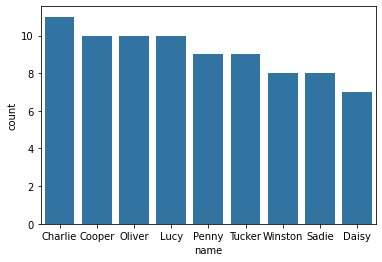

In [437]:
base_color = sb.color_palette()[0]
#select top 10 names counts and exclude `None` count to plot the rest 
name_counts = archive_clean['name'].value_counts().head(10)
name_counts = name_counts.iloc[1:]
name_order = name_counts.index

#plot
sb.countplot(data=archive_clean , x='name' , order=name_order , color = base_color);

>Most dogs in our data has no names but most used names are Charlie , Lucy , Cooper and Oliver.

### Favorite count Vs. Retween count

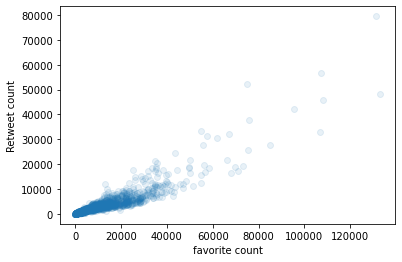

In [549]:
sb.regplot(data = archive_clean, x = 'favorite_count', y = 'retweet_count', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('favorite count')
plt.ylabel('Retweet count');

>most favorited and retweets are below 20k in the lower left corner of the plot .
As the favorites increase a slight increase in the retweet counts.

### Dog stage

In [553]:
dog_counts = archive_clean.groupby('dog_stage')['tweet_id'].count()
dog_counts = dog_counts.iloc[1:]
dog_counts

dog_stage
doggo                65
doggo and pupper      5
floofer               7
pupper              205
puppo                22
Name: tweet_id, dtype: int64

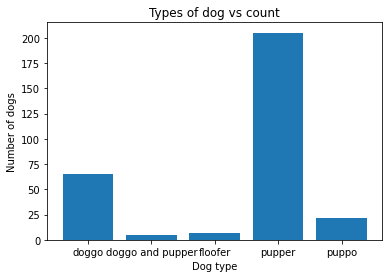

In [555]:
plt.bar([1, 2, 3, 4,5], dog_counts, tick_label=['doggo','doggo and pupper' ,'floofer', 'pupper', 'puppo'])
plt.title('Types of dog vs count')
plt.xlabel('Dog type')
plt.ylabel('Number of dogs');

>As shown in the bar plot pupper is the most occurred dog stage in the tweets with around 200 dogs.
Doggo comes in the second place around 70 dogs.

### Most Liked tweet 

In [438]:
archive_clean.sort_values(by=['favorite_count'] , ascending=False).head(1)

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
348,822872901745569793,Here's a super supportive puppo participating ...,2017-01-21 18:26:02,13,10,None,puppo,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland terrier,0.196015,True,Labrador retriever,0.160329,True,Irish terrier,0.069126,True


<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" width="500" height="600">

>This is the most liked dog it has no name but its a puppo and he's a `Lakeland terrier`

In [439]:
archive_clean.to_csv('archive_clean_master.csv')